In [2]:
# Import necessary libraries
import sys
import pandas as pd          # For data manipulation and analysis
import numpy as np           # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
from PIL import Image
import seaborn as sns        # For statistical data visualization
import tensorflow as tf      # TensorFlow for deep learning
import random
# Import specific modules from TensorFlow Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
# Specify the base path where your image data is stored
base_path = '../real_vs_fake/real-vs-fake/'

# Create an ImageDataGenerator for image preprocessing and augmentation
image_gen = ImageDataGenerator(rescale=1./255.,
                               brightness_range=(0.5, 1.5))
# The 'rescale' parameter normalizes pixel values to the range [0, 1] by dividing each pixel value by 255

In [15]:
bright_train_64 = image_gen.flow_from_directory(
    base_path + 'train/',
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary'
)
bright_valid_64 = image_gen.flow_from_directory(
    base_path + 'valid/',
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary'
)
bright_test_64 = image_gen.flow_from_directory(
    base_path + 'test/',
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary'
)

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [13]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape = (224, 224, 3), activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(128, activation = 'relu'))
classifier.add(Dense(1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [16]:
bright_64 = classifier.fit(bright_train_64,
                           steps_per_epoch=len(bright_train_64),
                           epochs = 10,
                           validation_data = bright_valid_64)

Epoch 1/10


2023-12-06 09:31:27.774743: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1563/1563 [==============================] - 184s 118ms/step - loss: 0.5773 - accuracy: 0.7088 - val_loss: 0.4684 - val_accuracy: 0.7799
Epoch 2/10
1563/1563 [==============================] - 183s 117ms/step - loss: 0.4049 - accuracy: 0.8214 - val_loss: 0.4079 - val_accuracy: 0.8217
Epoch 3/10
1563/1563 [==============================] - 180s 115ms/step - loss: 0.3217 - accuracy: 0.8643 - val_loss: 0.3215 - val_accuracy: 0.8633
Epoch 4/10
1563/1563 [==============================] - 175s 112ms/step - loss: 0.2685 - accuracy: 0.8906 - val_loss: 0.2958 - val_accuracy: 0.8755
Epoch 5/10
1563/1563 [==============================] - 183s 117ms/step - loss: 0.2269 - accuracy: 0.9094 - val_loss: 0.2844 - val_accuracy: 0.8837
Epoch 6/10
1563/1563 [==============================] - 627s 401ms/step - loss: 0.1950 - accuracy: 0.9232 - val_loss: 0.2509 - val_accuracy: 0.8992
Epoch 7/10
1563/1563 [==============================] - 11738s 8s/step - loss: 0.1699 - accuracy: 0.9342 - val_loss: 0.2632

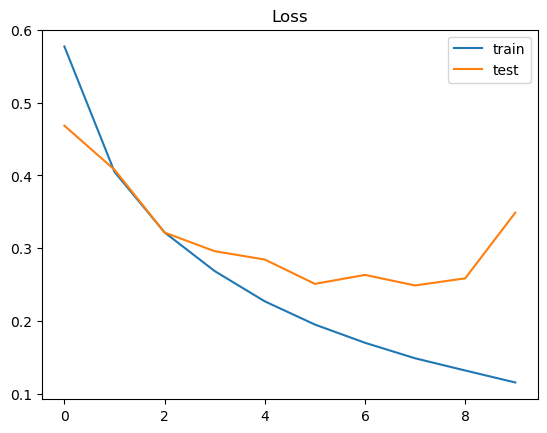

In [17]:
plt.plot(bright_64.history['loss'], label='train')
plt.plot(bright_64.history['val_loss'], label='test')
plt.legend()
plt.title('Loss')
plt.show()

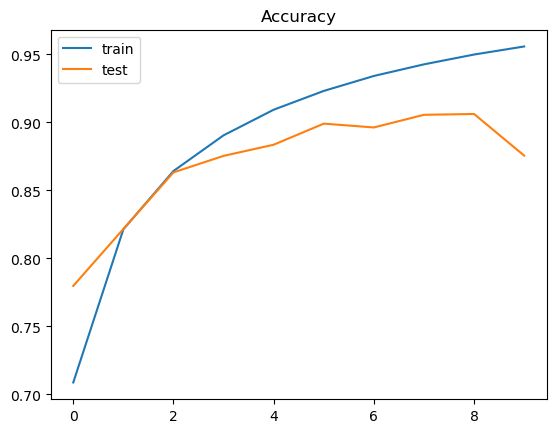

In [18]:
plt.plot(bright_64.history['accuracy'], label='train')
plt.plot(bright_64.history['val_accuracy'], label='test')
plt.legend()
plt.title('Accuracy')
plt.show()

In [19]:
y_true_64 = bright_test_64.classes
y_pred_64 = bright_64.model.predict(bright_test_64)

313/313 [==============================] - 26s 83ms/step


In [20]:
y_pred_labels_64 = (y_pred_64 < 0.5).astype(int)

In [21]:
from sklearn.metrics import confusion_matrix, classification_report

In [22]:
confusion_matrix(y_true_64, y_pred_labels_64)

array([[5805, 4195],
       [5868, 4132]])

In [23]:
bright_64_metric = classification_report(y_true_64, y_pred_labels_64)

In [24]:
print(bright_64_metric)

              precision    recall  f1-score   support

           0       0.50      0.58      0.54     10000
           1       0.50      0.41      0.45     10000

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.50      0.50      0.49     20000



In [25]:
bright_train_32 = image_gen.flow_from_directory(
    base_path + 'train/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)
bright_valid_32 = image_gen.flow_from_directory(
    base_path + 'valid/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)
bright_test_32 = image_gen.flow_from_directory(
    base_path + 'test/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [26]:
bright_32 = classifier.fit(bright_train_32,
                           steps_per_epoch=len(bright_train_32),
                           epochs = 10,
                           validation_data = bright_valid_32)

Epoch 1/10
3125/3125 [==============================] - 185s 59ms/step - loss: 0.1430 - accuracy: 0.9451 - val_loss: 0.2637 - val_accuracy: 0.9043
Epoch 2/10
3125/3125 [==============================] - 194s 62ms/step - loss: 0.1209 - accuracy: 0.9546 - val_loss: 0.3306 - val_accuracy: 0.8949
Epoch 3/10
3125/3125 [==============================] - 196s 63ms/step - loss: 0.1068 - accuracy: 0.9601 - val_loss: 0.5027 - val_accuracy: 0.8528
Epoch 4/10
3125/3125 [==============================] - 195s 62ms/step - loss: 0.0977 - accuracy: 0.9643 - val_loss: 0.3222 - val_accuracy: 0.9021
Epoch 5/10
3125/3125 [==============================] - 194s 62ms/step - loss: 0.0857 - accuracy: 0.9682 - val_loss: 0.3152 - val_accuracy: 0.9063
Epoch 6/10
3125/3125 [==============================] - 197s 63ms/step - loss: 0.0803 - accuracy: 0.9703 - val_loss: 0.3518 - val_accuracy: 0.8976
Epoch 7/10
3125/3125 [==============================] - 198s 63ms/step - loss: 0.0738 - accuracy: 0.9730 - val_loss: 0

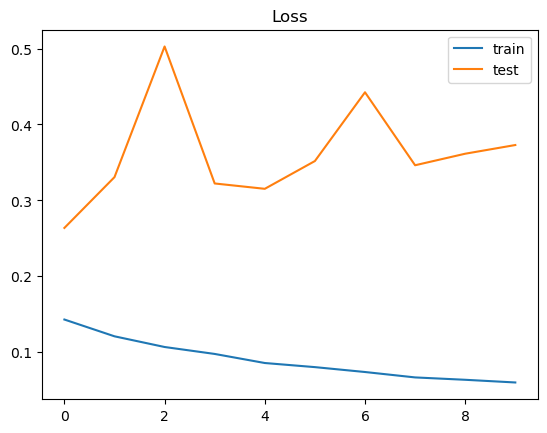

In [27]:
plt.plot(bright_32.history['loss'], label='train')
plt.plot(bright_32.history['val_loss'], label='test')
plt.legend()
plt.title('Loss')
plt.show()

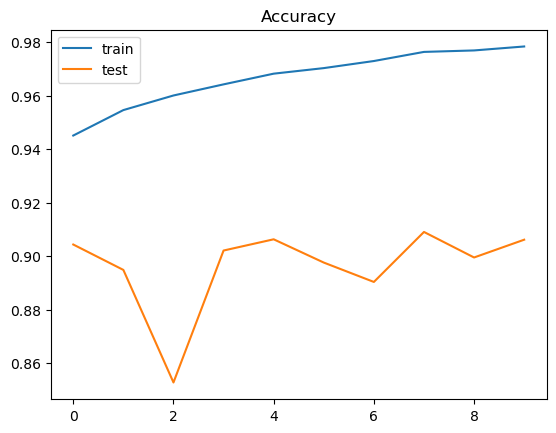

In [28]:
plt.plot(bright_32.history['accuracy'], label='train')
plt.plot(bright_32.history['val_accuracy'], label='test')
plt.legend()
plt.title('Accuracy')
plt.show()

In [29]:
y_true_32 = bright_test_32.classes
y_pred_32 = bright_32.model.predict(bright_test_32)

625/625 [==============================] - 28s 45ms/step


In [30]:
y_pred_labels_32 = (y_pred_32 < 0.5).astype(int)

In [31]:
confusion_matrix(y_true_32, y_pred_labels_32)

array([[4898, 5102],
       [4818, 5182]])

In [32]:
bright_32_metric = classification_report(y_true_32, y_pred_labels_32)
print(bright_32_metric)

              precision    recall  f1-score   support

           0       0.50      0.49      0.50     10000
           1       0.50      0.52      0.51     10000

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



In [35]:
bright_train_128 = image_gen.flow_from_directory(
    base_path + 'train/',
    target_size=(224, 224),
    batch_size=128,
    class_mode='binary'
)
bright_valid_128 = image_gen.flow_from_directory(
    base_path + 'valid/',
    target_size=(224, 224),
    batch_size=128,
    class_mode='binary'
)
bright_test_128 = image_gen.flow_from_directory(
    base_path + 'test/',
    target_size=(224, 224),
    batch_size=128,
    class_mode='binary'
)

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [36]:
bright_128 = classifier.fit(bright_train_128,
                           steps_per_epoch=len(bright_train_128),
                           epochs = 10,
                           validation_data = bright_valid_128)

Epoch 1/10
782/782 [==============================] - 212s 272ms/step - loss: 0.0205 - accuracy: 0.9939 - val_loss: 0.3487 - val_accuracy: 0.9188
Epoch 2/10
782/782 [==============================] - 191s 244ms/step - loss: 0.0134 - accuracy: 0.9967 - val_loss: 0.3707 - val_accuracy: 0.9180
Epoch 3/10
782/782 [==============================] - 185s 236ms/step - loss: 0.0115 - accuracy: 0.9972 - val_loss: 0.4007 - val_accuracy: 0.9136
Epoch 4/10
782/782 [==============================] - 184s 235ms/step - loss: 0.0171 - accuracy: 0.9948 - val_loss: 0.4085 - val_accuracy: 0.9154
Epoch 5/10
782/782 [==============================] - 185s 236ms/step - loss: 0.0196 - accuracy: 0.9938 - val_loss: 0.4221 - val_accuracy: 0.9155
Epoch 6/10
782/782 [==============================] - 186s 237ms/step - loss: 0.0138 - accuracy: 0.9959 - val_loss: 0.4296 - val_accuracy: 0.9181
Epoch 7/10
782/782 [==============================] - 199s 254ms/step - loss: 0.0161 - accuracy: 0.9949 - val_loss: 0.5041 -

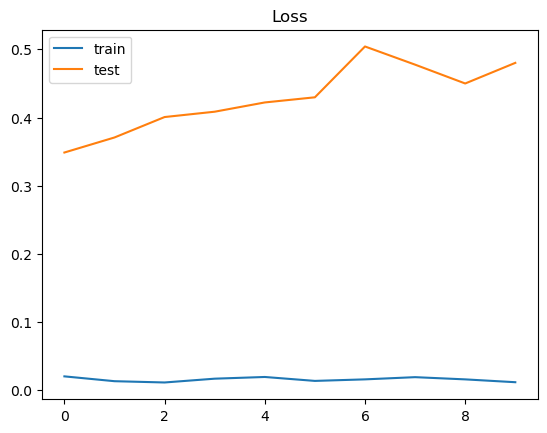

In [37]:
plt.plot(bright_128.history['loss'], label='train')
plt.plot(bright_128.history['val_loss'], label='test')
plt.legend()
plt.title('Loss')
plt.show()

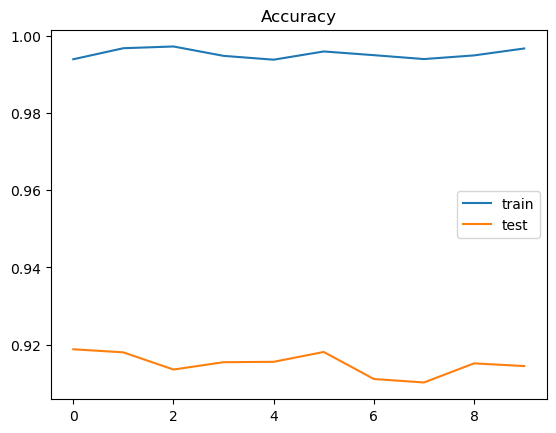

In [38]:
plt.plot(bright_128.history['accuracy'], label='train')
plt.plot(bright_128.history['val_accuracy'], label='test')
plt.legend()
plt.title('Accuracy')
plt.show()

In [39]:
y_true_128 = bright_test_128.classes
y_pred_128 = bright_128.model.predict(bright_test_128)

157/157 [==============================] - 25s 159ms/step


In [40]:
y_pred_labels_128 = (y_pred_128 < 0.5).astype(int)

In [41]:
confusion_matrix(y_true_128, y_pred_labels_128)

array([[4927, 5073],
       [4887, 5113]])

In [42]:
bright_128_metric = classification_report(y_true_128, y_pred_labels_128)
print(bright_128_metric)

              precision    recall  f1-score   support

           0       0.50      0.49      0.50     10000
           1       0.50      0.51      0.51     10000

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



The only model worth further exploration is the 64 batch, 0.5 - 1.5 brightness model.

In [44]:
def create_cnn(filters, kernel_size, pool_size, dense_units):
    classifier = Sequential()
    classifier.add(Convolution2D(filters, kernel_size, input_shape = (224, 224, 3), activation = 'relu'))
    classifier.add(MaxPooling2D(pool_size=pool_size))
    classifier.add(Flatten())
    classifier.add(Dense(dense_units, activation = 'relu'))
    classifier.add(Dense(1, activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [45]:
param_grid = {
    'filters': [32, 64],
    'kernel_size': [(3, 3), (5, 5)],
    'pool_size': [(2, 2), (3, 3)],
    'dense_units': [128, 256]}

In [46]:
from sklearn.model_selection import GridSearchCV

In [1]:
cnn_model = KerasClassifier(build_fn=create_cnn, epochs=5, batch_size=32, verbose=0)
grid = GridSearchCV(estimator=cnn_model, param_grid=param_grid, scoring='accuracy', cv=3)

NameError: name 'KerasClassifier' is not defined